# Outlier Detection

We will continue with our House Price Prediction Project. To maximize the quality of the predictions later on, it's important to identify the outliers before modeling.

### Prediction of House Prices: Outlier Detection

We can continue in the same notebook as in the activityData Exploration.

Let's check the values of our target variable together with the other numeric attributes we identified as important in the previous tutorial: - TotalBsmtSF - GrLivArea

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df_train = pd.read_csv('train.csv')

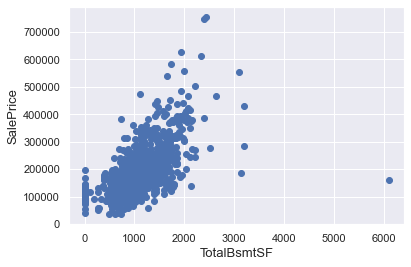

In [3]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

We can see that there is one house with a really huge basement and a cheap price. This house would cause problems in modeling because, except for this one house, we can see a clear linear relationship between the size of a basement and the price of a house.

Now we are going to remove this outlier from our dataset. We will remove all observations that have more than 5,000 square feet of basement and a price lower than $300,000:

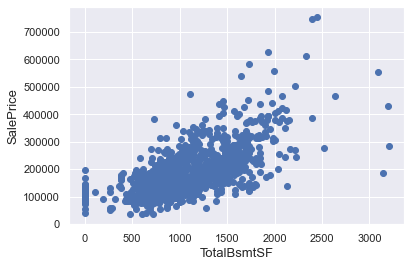

In [4]:
# delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)

# reset index
df_train = df_train.reset_index(drop=True)

# check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

We can see that the relationship in the picture is much nicer now.

Let's check another numeric variable from the output of the previous tutorial: `GrLivArea`.

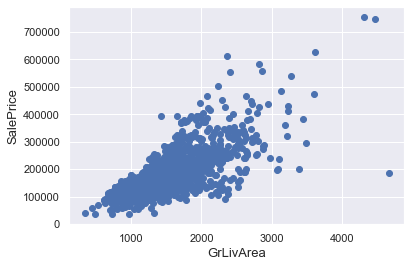

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

This is a good example of multivariate outliers. If we look only at `GrLivArea` there are no outliers because the largest area is quite close to the second and the third largest. However, if we take a look at *SalePrice* together with `GrLivArea`, we can see that the price of the largest house is really small, which will again cause problems in the modeling step. Therefore we should remove this observation as well:

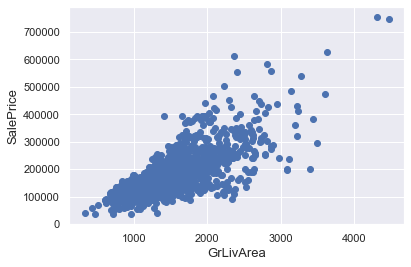

In [6]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.reset_index(drop=True)

fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We can see that this relationship is now also nice and linear :).

>The removal of outliers is not always safe. We decided to delete these two as they are very extreme - i.e. extremely large areas for very low prices.